
# Machine Learning Assignment: Marketing Campaign Performance Prediction

Objective: Your task is to build a machine learning model that predicts the conversion rate of marketing campaigns based on various features.


# Tasks

` 1)Data Exploration and Preprocessing:`

- Explore the dataset to understand its characteristics.
- Handle any missing or anomalous data.
- Perform any necessary data transformation or scaling.

` 2)Feature Engineering:`
- Create new features if needed.
- Select relevant features for the model.

` 3)Model Building and Evaluation:`
- Choose a suitable machine learning algorithm for this regression problem.
- Train and validate your model. You may split the data into training and validation sets.
- Evaluate the model performance using appropriate metrics (e.g., RMSE, MAE).

` 4)Model Interpretation:`
- Interpret the results and provide insights.
- Discuss the importance of different features and their impact on the conversion rate.

` 5)Report and Code:`
-Prepare a brief report summarizing your methodology, findings, and any assumptions made.
-Include visualizations to support your analysis.
-Provide well-documented and clean code in a Jupyter Notebook or Python script.

### Submission Guidelines:
Submit your report and code through a collab notebook or a github repo
Ensure your code is reproducible and includes comments explaining your logic.
If you have made any assumptions or simplifications, clearly state them in your report.

### Evaluation Criteria:
Understanding of machine learning concepts and algorithms.
Ability to preprocess and analyze data effectively.
Quality and clarity of the code.
Insights and interpretation of the model's results.
Overall approach to solving the problem and communication in the report.


In [2]:
#!pip install missingno


import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import MinMaxScaler






df = pd.read_csv('/home/ozkan/zAssignment/marketing_campaign_data_socail_media.csv',encoding='utf-8')
df.head(5)

,Campaign_Type,Duration,Budget,Audience_Size,Audience_Age_Group,Engagement_Rate,Conversion_Rate
0,Instagram,45,95.802761,75579,35-44,7.775563,1.890406
1,YouTube,26,84.123524,88376,18-24,1.971576,4.269139
2,Instagram,50,91.688038,99427,25-34,5.504620,0.702806
3,YouTube,41,61.214077,40325,25-34,7.387365,2.035973
4,YouTube,40,74.356604,10775,18-24,4.336349,4.858624


Campaign_Type         0.0
Duration              0.0
Budget                0.0
Audience_Size         0.0
Audience_Age_Group    0.0
Engagement_Rate       0.0
Conversion_Rate       0.0
dtype: float64
---------------------------
-------------------------------


<Axes: >

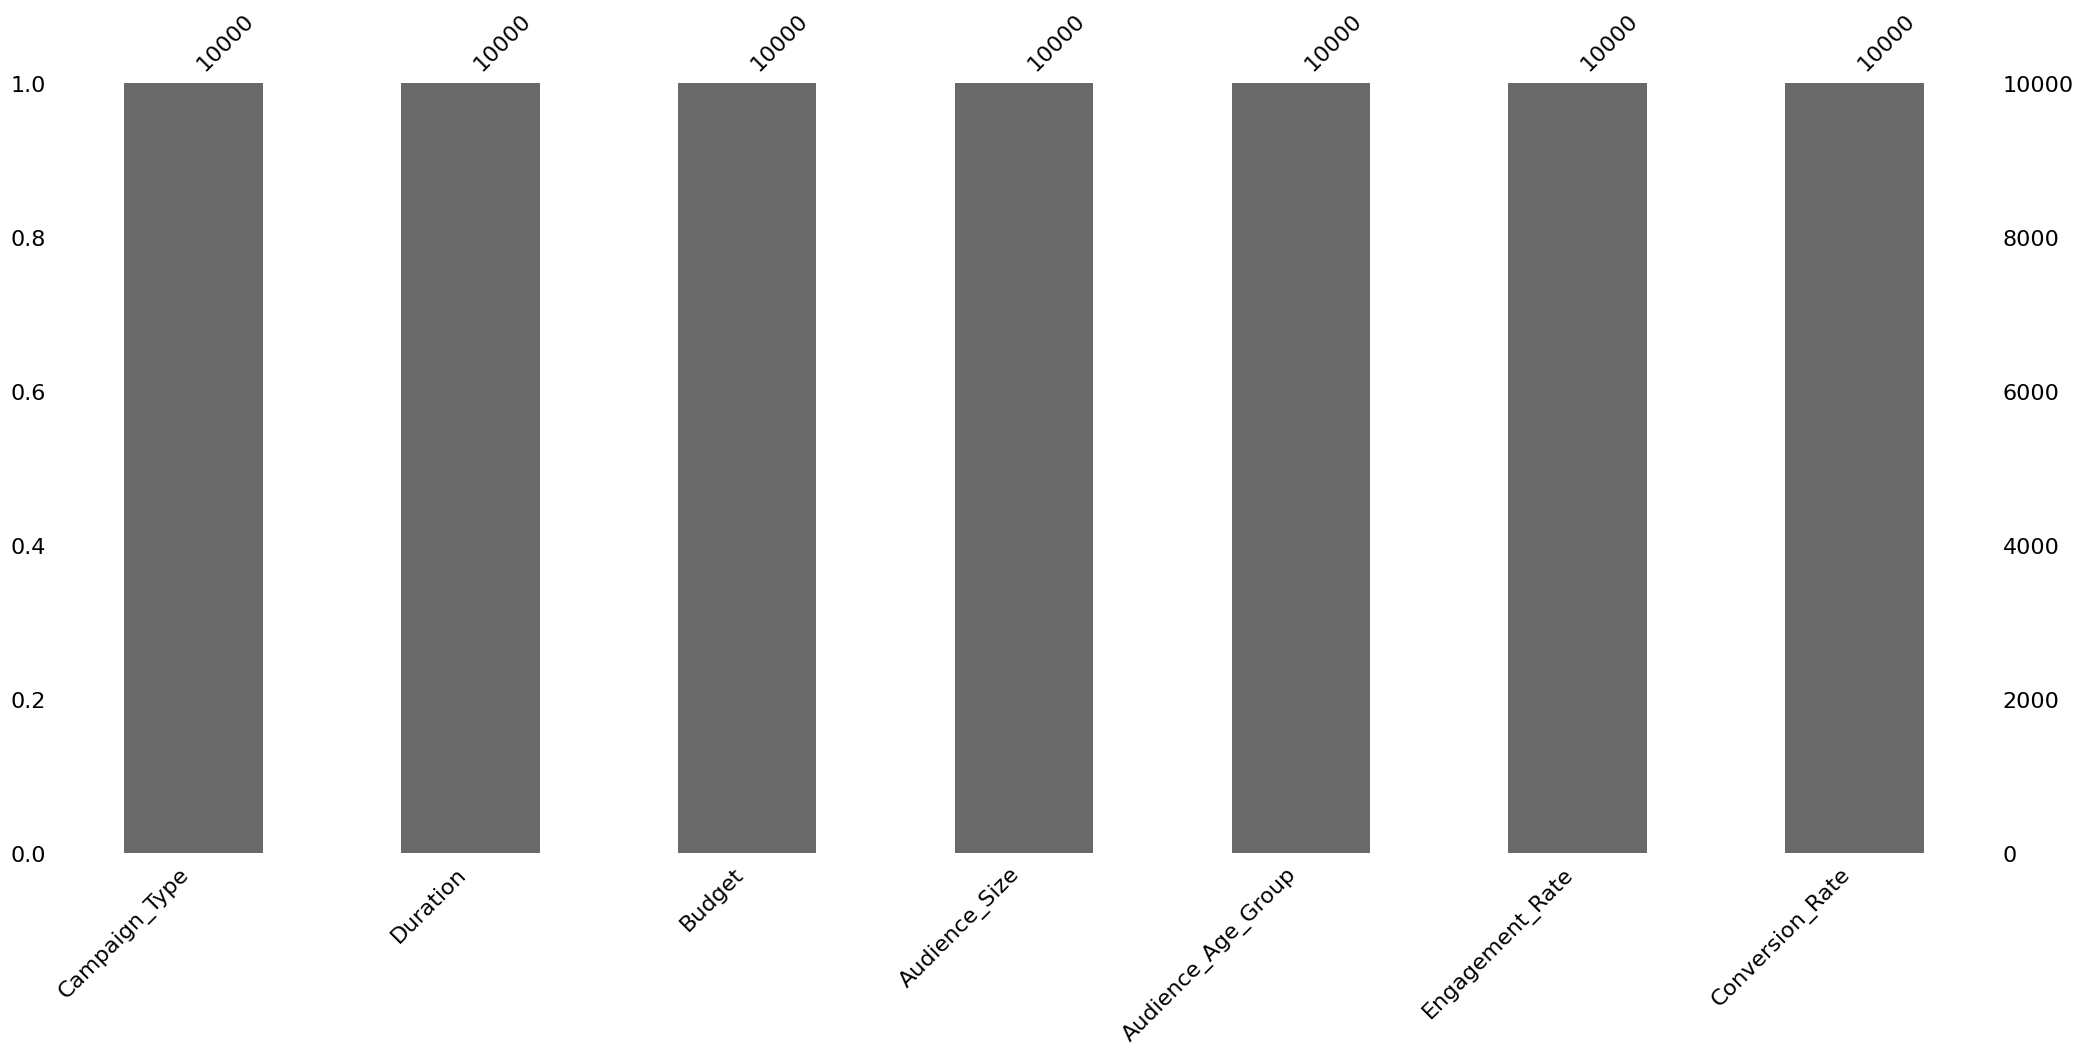

In [3]:
print(df.isnull().sum() * 100 / len(df)) #No missing value.
print('---------------------------')
df.duplicated().value_counts() #is there any duplicated value? -> False : 10000
print('-------------------------------')
msno.bar(df) 

In [4]:
col = []
d_type = []
uniques = []
n_uniques = []
for i in df.columns:
    col.append(i)
    d_type.append(df[i].dtypes)
    uniques.append(df[i].unique()[:10])
    n_uniques.append(df[i].nunique())

insight_df=pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_values': uniques, 'n_uniques': n_uniques})
insight_df

,Column,d_type,unique_values,n_uniques
0,Campaign_Type,object,"[Instagram, YouTube, Snapchat, Facebook, TikTok]",5
1,Duration,int64,"[45, 26, 50, 41, 40, 42, 33, 58, 6, 27]",59
2,Budget,float64,"[95.80276112896576, 84.12352444124747, 91.6880...",10000
3,Audience_Size,int64,"[75579, 88376, 99427, 40325, 10775, 85995, 237...",9523
4,Audience_Age_Group,object,"[35-44, 18-24, 25-34, 45-54, 55-64]",5
5,Engagement_Rate,float64,"[7.775562903000708, 1.971575504316236, 5.50462...",10000
6,Conversion_Rate,float64,"[1.890406068991072, 4.269138601926646, 0.70280...",10000


<Axes: xlabel='Duration hue with Campaign_Type', ylabel='Count'>

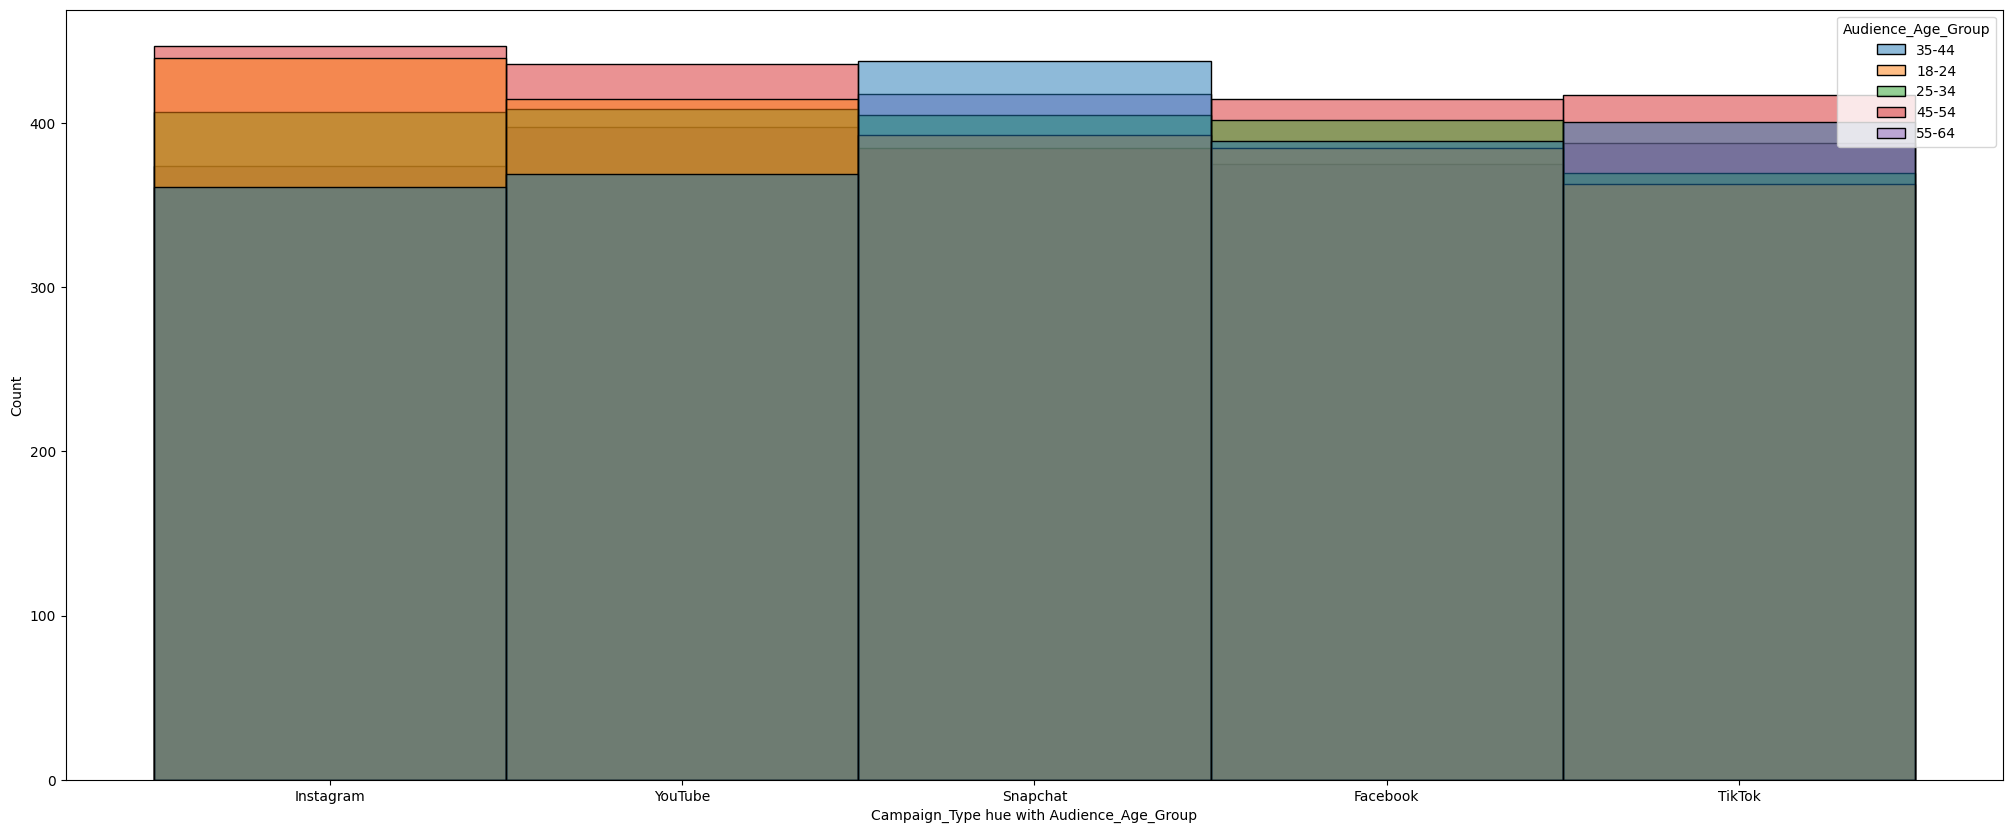

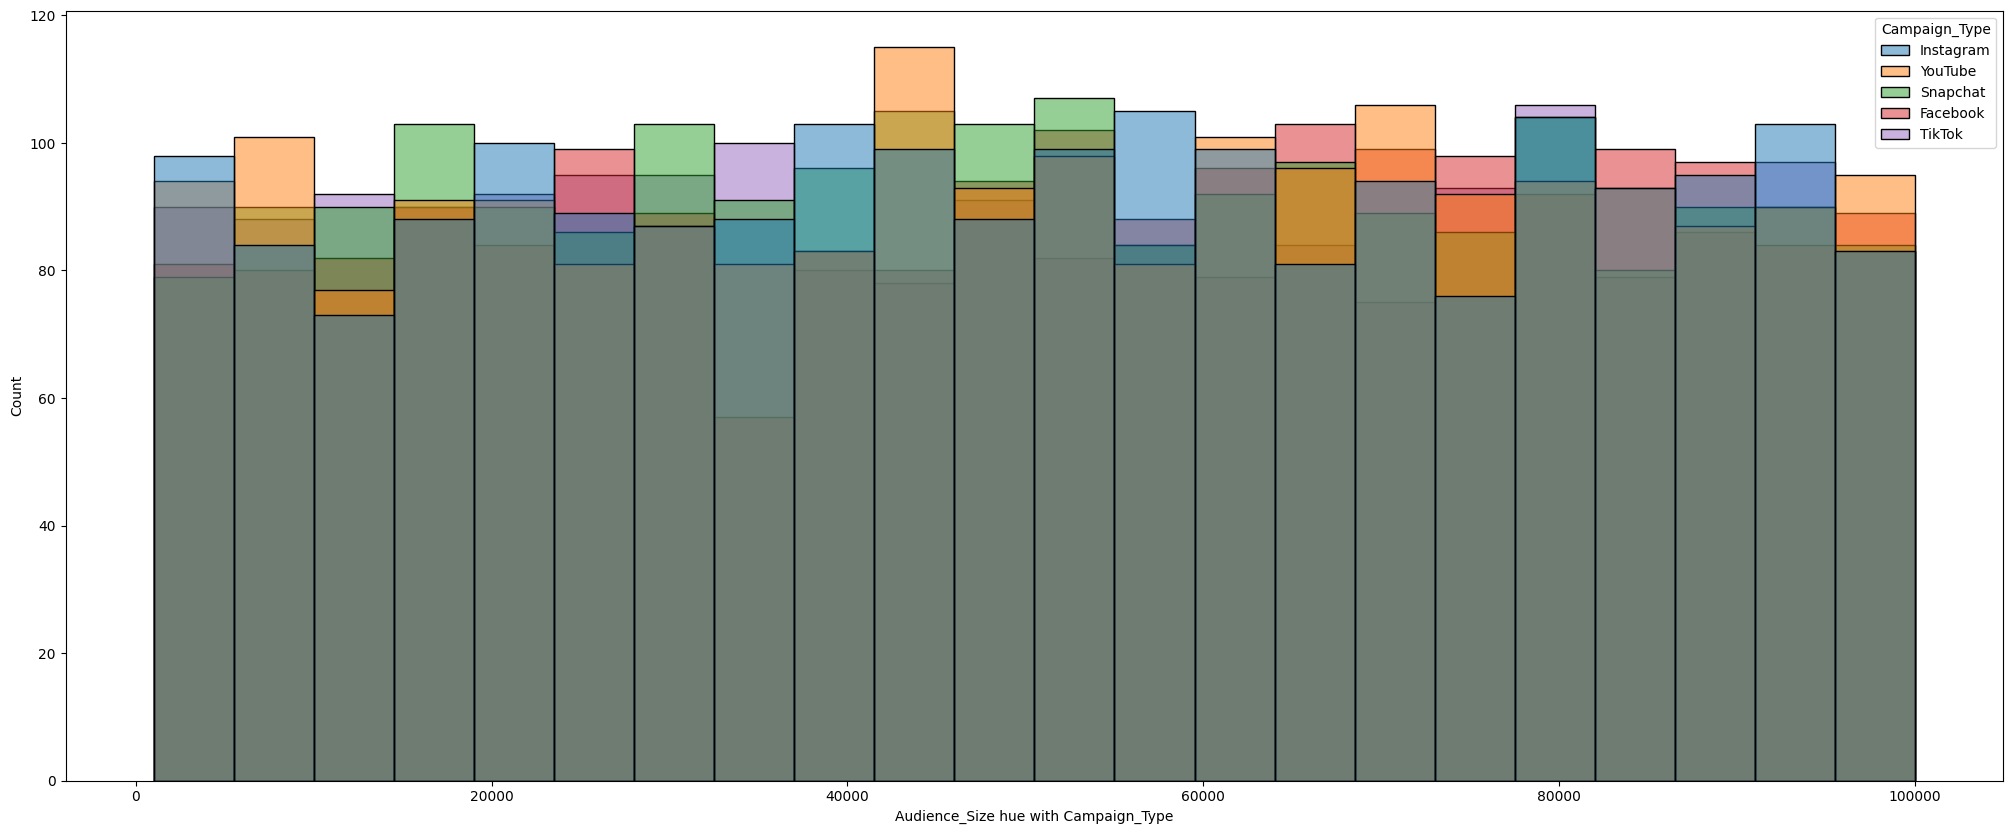

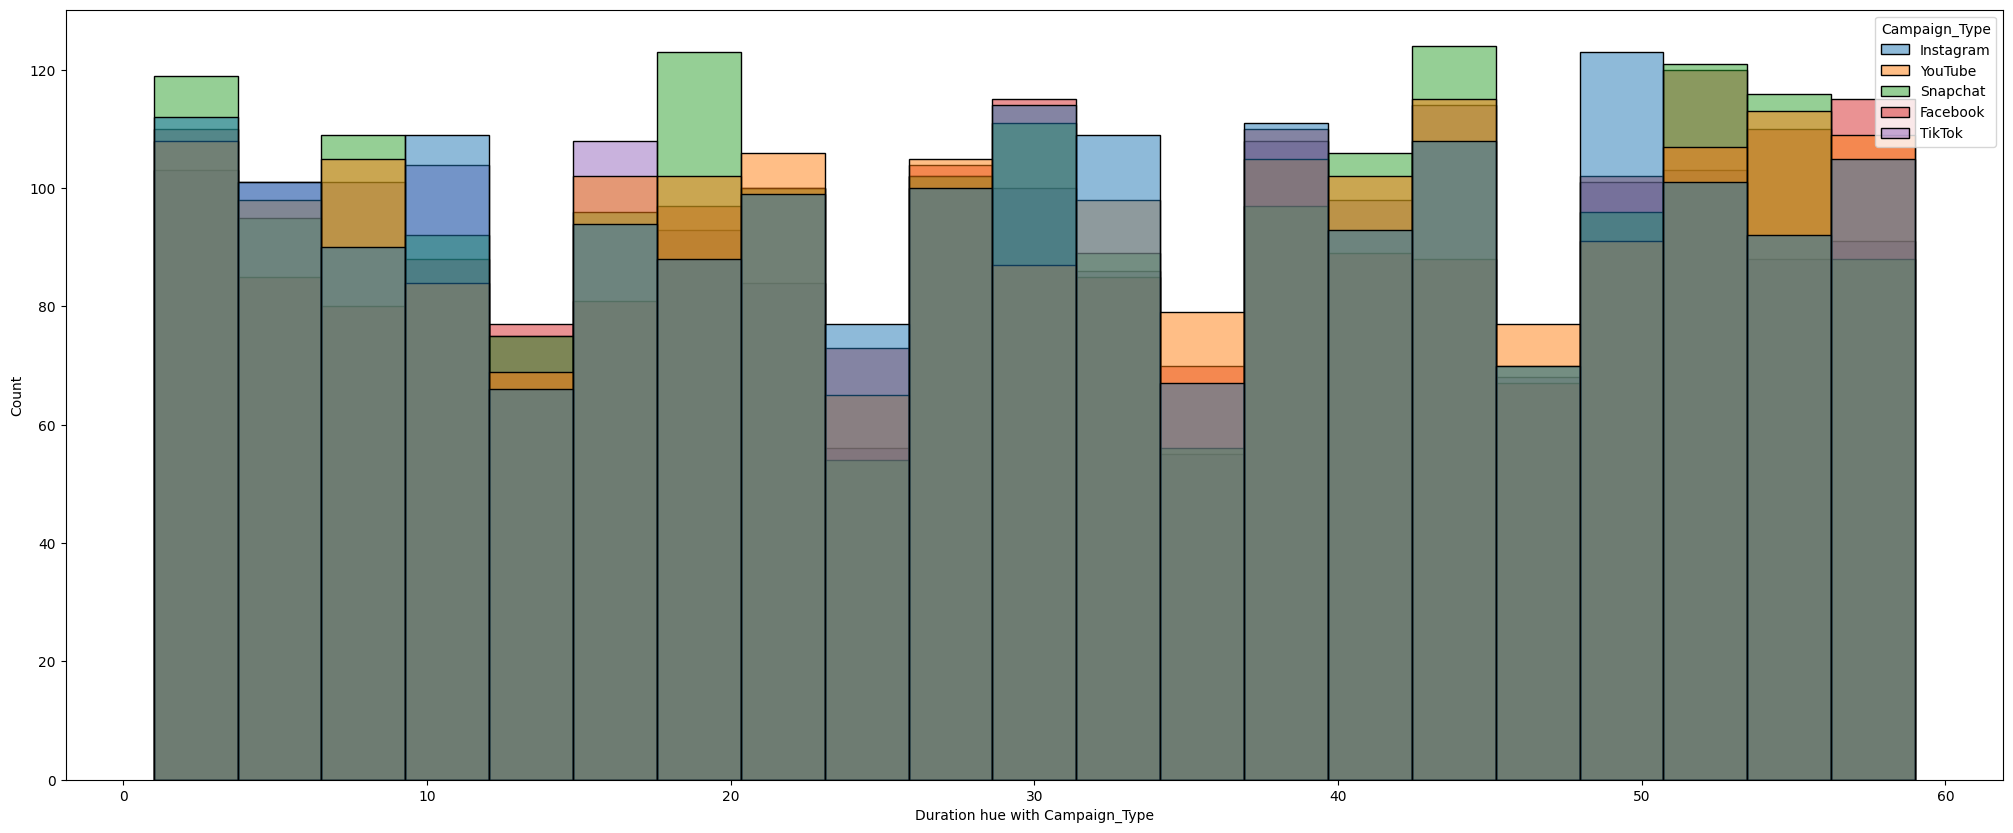

In [5]:
plt.figure(figsize=(25,10))
plt.xlabel('Campaign_Type hue with Audience_Age_Group')
sns.histplot(x=df["Campaign_Type"],hue='Audience_Age_Group',data=df)

plt.figure(figsize=(25,10))
plt.xlabel('Audience_Size hue with Campaign_Type')
sns.histplot(x=df["Audience_Size"],hue='Campaign_Type',data=df)
 
plt.figure(figsize=(25,10))
plt.xlabel('Duration hue with Campaign_Type')
sns.histplot(x=df["Duration"],hue='Campaign_Type',data=df)



# Heatmap

(7.5, -0.5)

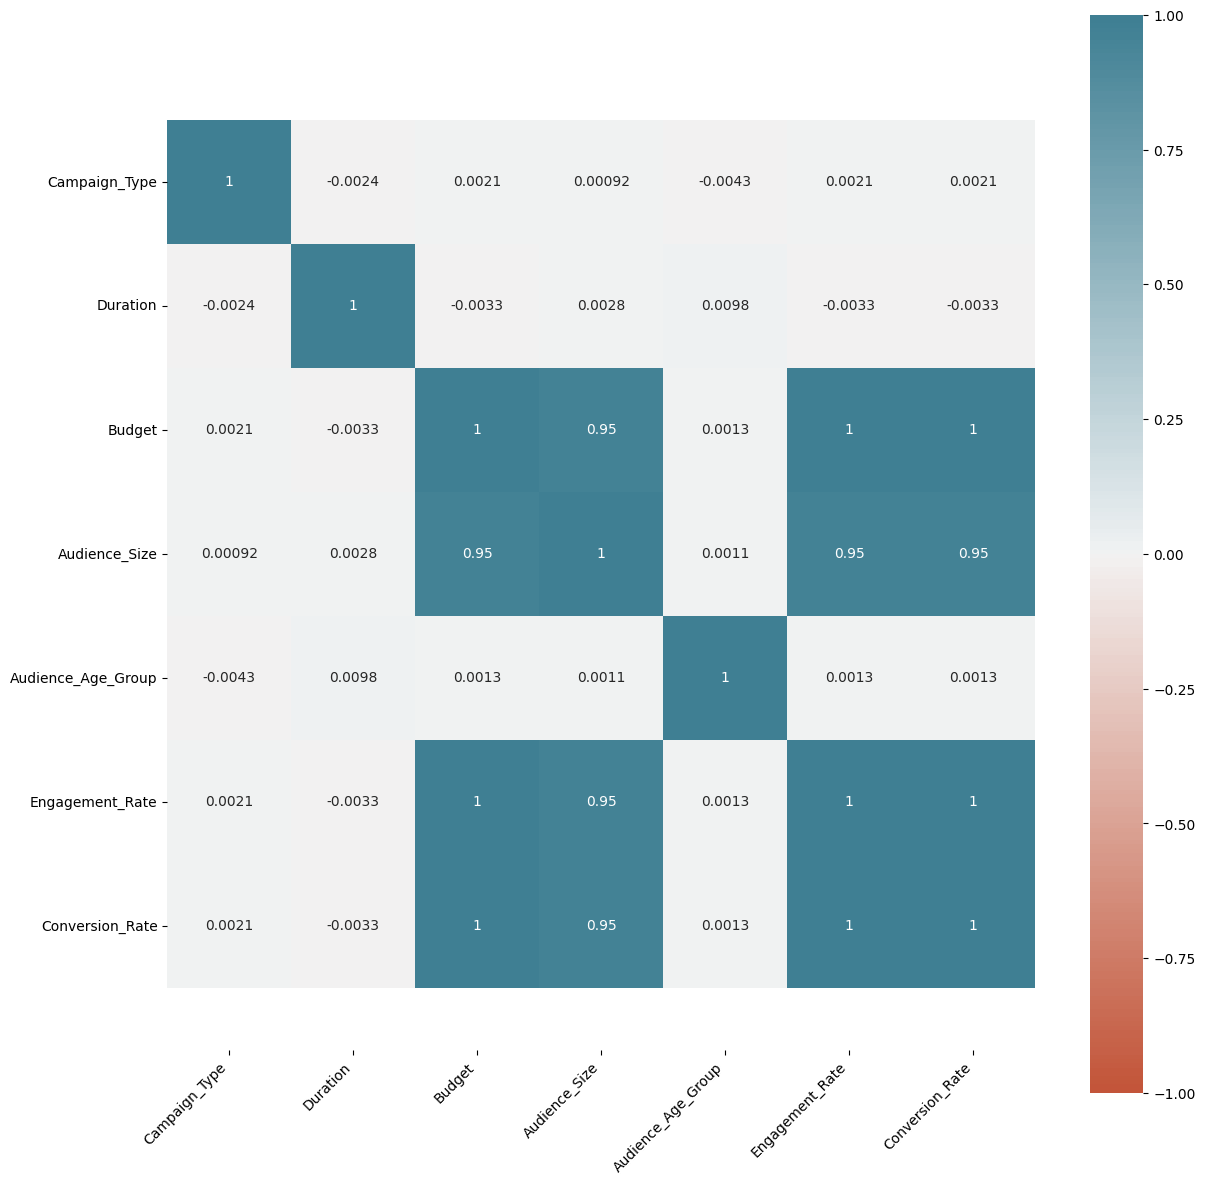

In [6]:
corr_df = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_df

# Corelation heatmap
corr = corr_df

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5)


# If we need use Transformation,: -Scaling,Outlier, 

count    10000.000000
mean         5.469257
std          2.596781
min          1.001260
25%          3.180886
50%          5.477351
75%          7.718424
max          9.997279
Name: Engagement_Rate, dtype: float64
-----------------

count    10000.000000
mean     50836.461400
std      28388.986716
min       1013.000000
25%      26391.000000
50%      51077.000000
75%      75305.250000
max      99999.000000
Name: Audience_Size, dtype: float64


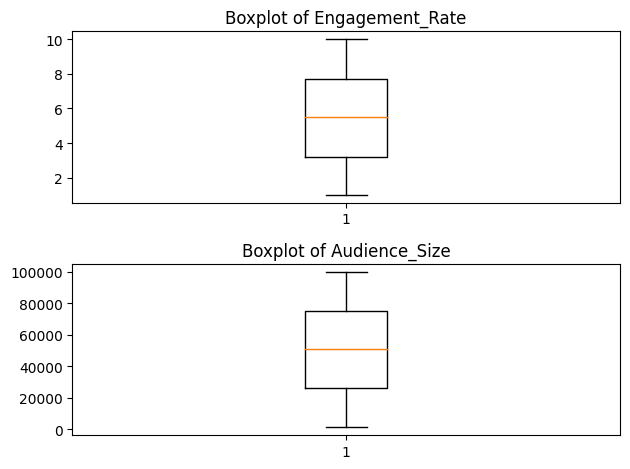

In [7]:
print(df['Engagement_Rate'].describe())
print('-----------------\n')
print(df['Audience_Size'].describe())

fig, axs = plt.subplots(2)
axs[0].boxplot(df['Engagement_Rate'])
axs[0].set_title('Boxplot of Engagement_Rate')


axs[1].boxplot(df['Audience_Size'])
axs[1].set_title('Boxplot of Audience_Size')

plt.tight_layout()
plt.show()


#df['Audience_Size'].mean() #50836.4614
#df['Engagement_Rate'].mean() #5.4692

#!TODO : Can be convertable Convert Type of Audience_Size & Engagement_Rate

<Axes: xlabel='Duration'>

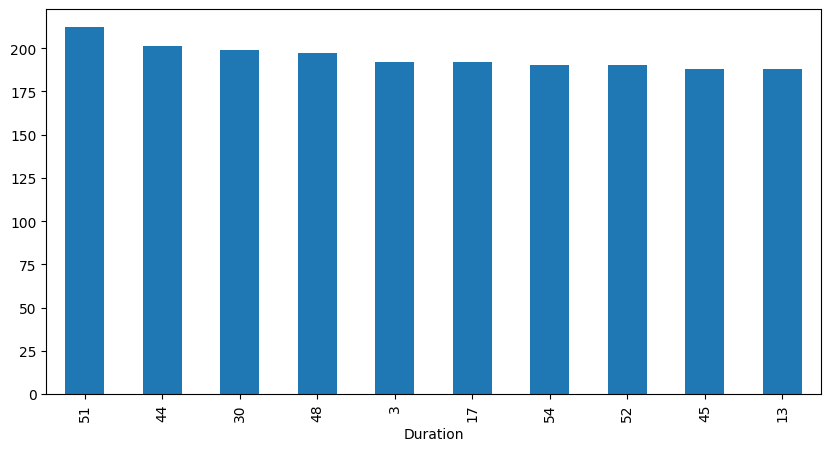

In [8]:
df['Duration'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5)) #nlargest=values  ->TODO:30dan büyükse 1 ay oldu mu kolonuna 1 olmadıysa 0 yapabılırız.

In [9]:
def print_group_stats(df, group_col):
    print(df.groupby(group_col).Budget.agg(["count", "mean", "median", "std", "min", "max"]))
    print('-----------------\n')

group_columns = ["Campaign_Type", "Audience_Age_Group"]

for col in group_columns:
    print_group_stats(df, col)


               count       mean     median        std        min        max
Campaign_Type                                                              
Facebook        1966  55.098447  55.899341  26.140936  10.051209  99.942496
Instagram       2029  55.037611  55.806357  25.782038  10.041969  99.986975
Snapchat        2039  54.703348  54.723271  25.925640  10.093961  99.957849
TikTok          1939  54.315078  54.772853  26.115757  10.031045  99.987006
YouTube         2027  55.806884  56.372709  26.268057  10.020753  99.968583
-----------------

                    count       mean     median        std        min  \
Audience_Age_Group                                                      
18-24                1996  53.880231  53.760993  26.286485  10.051931   
25-34                1993  54.855956  55.803743  25.783199  10.051209   
35-44                1958  55.543339  56.287895  25.944291  10.041969   
45-54                2100  55.348727  56.079035  26.059528  10.020753   
55-64      

In [10]:
duratıon_rate = df.groupby('Campaign_Type')['Duration'].value_counts().to_frame().rename(columns={'Duration': 'Freq'}).reset_index().sort_values('Campaign_Type')
print(duratıon_rate.head(10))
print('---------\n')
Audience_Age_Group_rate = df.groupby('Campaign_Type')['Audience_Age_Group'].value_counts().to_frame().rename(columns={'Audience_Age_Group': 'Freq'}).reset_index().sort_values('Campaign_Type')
print(Audience_Age_Group_rate.head(10))


   Campaign_Type  Duration  count
0       Facebook         3     50
32      Facebook        40     31
33      Facebook        50     31
34      Facebook        28     31
35      Facebook        49     31
36      Facebook        44     31
37      Facebook        41     30
38      Facebook        34     30
39      Facebook        55     30
40      Facebook        25     30
---------

  Campaign_Type Audience_Age_Group  count
0      Facebook              45-54    415
1      Facebook              25-34    402
2      Facebook              35-44    389
3      Facebook              18-24    385
4      Facebook              55-64    375
5     Instagram              45-54    447
6     Instagram              18-24    440
7     Instagram              25-34    407
8     Instagram              55-64    374
9     Instagram              35-44    361


# Scaling

In [11]:
scaler = MinMaxScaler(feature_range=(1, 10))
df['Audience_Size_Scaled'] = scaler.fit_transform(df[['Audience_Size']])
print(df['Audience_Size_Scaled'].describe())

count    10000.000000
mean         5.530046
std          2.581182
min          1.000000
25%          3.307417
50%          5.551916
75%          7.754796
max         10.000000
Name: Audience_Size_Scaled, dtype: float64


# Feature Engineering

In [12]:
#df['Duration'].max() #59 not 2 month
#df['Campaign_Type'].value_counts() # Snapchat     2039,Instagram    2029,YouTube      2027,Facebook     1966,TikTok       1939
#df['Audience_Age_Group'].value_counts() # 45-54:    2100,  18-24:    1996,  25-34:    1993, 35-44:    1958,   55-64:    1953

def categorize_duration(duration):
    if duration <=30:
        return 0 
    elif 30 < duration <=60 :
        return 1
    else : 
        return 2


def generate_category_of_Campaign(row):
    if row['Campaign_Type'] == 'Snapchat':
        return 1
    elif row['Campaign_Type'] == 'Instagram':
        return 2
    elif row['Campaign_Type'] == 'YouTube':
        return 3
    elif row['Campaign_Type'] == 'Facebook':
        return 4
    elif row['Campaign_Type'] == 'TikTok':
        return 5
    else:
        return 'Unknown'


def generate_category_of_Age(row):
    if row['Audience_Age_Group'] == '45-54':
        return 1
    elif row['Audience_Age_Group'] == '18-24':
        return 2
    elif row['Audience_Age_Group'] == '25-34':
        return 3
    elif row['Audience_Age_Group'] == '35-44':
        return 4
    elif row['Audience_Age_Group'] == '55-64':
        return 5
    else:
        return 'Unknown'


df['Month_Of_Duration'] = df['Duration'].apply(categorize_duration)
df['Category_of_Campaign_Type'] = df.apply(generate_category_of_Campaign, axis=1)
df['Category_of_Audience_Age'] = df.apply(generate_category_of_Age, axis=1)



In [13]:
numerical_values = ['Budget', 'Audience_Size', 'Engagement_Rate']
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_data = poly.fit_transform(df[numerical_values])


interaction_features = poly.get_feature_names_out(input_features=numerical_values)
interaction_df = pd.DataFrame(interaction_data, columns=interaction_features)
df = pd.merge(df, interaction_df, on='Budget', how='left')


df['Duration_in_weeks'] = df['Duration'] / 7
df['Duration_in_months'] = df['Duration'] / 30
df['Duration_fraction_of_year'] = df['Duration'] / 365

# binned features
df['Budget_binned'] = pd.cut(df['Budget'], bins=10)
df['Audience_Size_binned'] = pd.cut(df['Audience_Size_x'], bins=10)
df['Engagement_Rate_binned'] = pd.cut(df['Engagement_Rate_x'], bins=10)

# log 
df['Budget_log'] = np.log(df['Budget'])
df['Audience_Size_log'] = np.log(df['Audience_Size_x'])
df['Engagement_Rate_log'] = np.log(df['Engagement_Rate_x'])

# Interaction between categorical variables
df['Campaign_Type_Audience_Age_Group'] = df['Campaign_Type'] + "_" + df['Audience_Age_Group']

# ^2
df['Budget_squared'] = df['Budget'] ** 2
df['Audience_Size_squared'] = df['Audience_Size_x'] ** 2
df['Engagement_Rate_squared'] = df['Engagement_Rate_x'] ** 2

# ^3
df['Budget_cubed'] = df['Budget'] ** 3
df['Audience_Size_cubed'] = df['Audience_Size_x'] ** 3
df['Engagement_Rate_cubed'] = df['Engagement_Rate_x'] ** 3

# Inverse of numerical variables
df['Budget_inverse'] = 1 / df['Budget']
df['Audience_Size_inverse'] = 1 / df['Audience_Size_x']
df['Engagement_Rate_inverse'] = 1 / df['Engagement_Rate_x']

#Drop Categorical Value
df.drop(['Campaign_Type','Audience_Age_Group'],axis=1,inplace=True)

df.head()

,Duration,Budget,Audience_Size_x,Engagement_Rate_x,Conversion_Rate,Audience_Size_Scaled,Month_Of_Duration,Category_of_Campaign_Type,Category_of_Audience_Age,Audience_Size_y,Engagement_Rate_y,Budget Audience_Size,Budget Engagement_Rate,Audience_Size Engagement_Rate,Duration_in_weeks,Duration_in_months,Duration_fraction_of_year,Budget_binned,Audience_Size_binned,Engagement_Rate_binned,Budget_log,Audience_Size_log,Engagement_Rate_log,Campaign_Type_Audience_Age_Group,Budget_squared,Audience_Size_squared,Engagement_Rate_squared,Budget_cubed,Audience_Size_cubed,Engagement_Rate_cubed,Budget_inverse,Audience_Size_inverse,Engagement_Rate_inverse
0,45,95.802761,75579,7.775563,1.890406,7.779686,1,2,4,75579.0,7.775563,7.240677e+06,744.920395,587669.268646,6.428571,1.500000,0.123288,"(90.99, 99.987]","(70303.2, 80201.8]","(7.298, 8.198]",4.562292,11.232934,2.050986,Instagram_35-44,9178.169040,5712185241,60.459378,879293.936134,431721248329539,470.105700,0.010438,0.000013,0.128608
1,26,84.123524,88376,1.971576,4.269139,8.943214,0,3,2,88376.0,1.971576,7.434501e+06,165.855880,174239.956769,3.714286,0.866667,0.071233,"(81.994, 90.99]","(80201.8, 90100.4]","(1.901, 2.8]",4.432286,11.389356,0.678833,YouTube_18-24,7076.767364,7810317376,3.887110,595322.612346,690244608421376,7.663731,0.011887,0.000011,0.507209
2,50,91.688038,99427,5.504620,0.702806,9.947993,1,2,3,99427.0,5.504620,9.116267e+06,504.707816,547307.861490,7.142857,1.666667,0.136986,"(90.99, 99.987]","(90100.4, 99999.0]","(5.499, 6.399]",4.518392,11.507179,1.705588,Instagram_25-34,8406.696303,9885728329,30.300842,770793.489707,982908310567483,166.794625,0.010907,0.000010,0.181666
3,41,61.214077,40325,7.387365,2.035973,4.574324,1,3,3,40325.0,7.387365,2.468458e+06,452.210732,297895.493275,5.857143,1.366667,0.112329,"(55.004, 64.001]","(30708.8, 40607.4]","(7.298, 8.198]",4.114377,10.604727,1.999771,YouTube_25-34,3747.163259,1626105625,54.573162,229379.141347,65572709328125,403.151863,0.016336,0.000025,0.135366
4,40,74.356604,10775,4.336349,4.858624,1.887580,1,3,2,10775.0,4.336349,8.011924e+05,322.436207,46724.163469,5.714286,1.333333,0.109589,"(72.997, 81.994]","(914.014, 10911.6]","(3.7, 4.6]",4.308872,9.284984,1.467033,YouTube_18-24,5528.904603,116100625,18.803925,411110.571729,1250984234375,81.540387,0.013449,0.000093,0.230609


# Train test split and model

In [14]:
# List of columns to be one-hot.
cols_to_encode = ['Budget_binned', 'Audience_Size_binned', 'Engagement_Rate_binned','Campaign_Type_Audience_Age_Group']
# Convert columns to string type and one-hot encode
df[cols_to_encode] = df[cols_to_encode].astype(str)
df = pd.get_dummies(df, columns=cols_to_encode)

# Conversion_Rate target variable
X = df.drop('Conversion_Rate', axis=1)
y = df['Conversion_Rate']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_val)

print(f'RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}')
print(f'MAE: {mean_absolute_error(y_val, y_pred)}')


cv_scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_squared_error))

cv_mean = cv_scores.mean()

print(f'Cross-validation mean score: {cv_mean}')

RMSE: 1.4297785468253794
MAE: 1.2387247680269433
Cross-validation mean score: 1.9977147110503501
Cross-validation standard deviation: 0.03989897515565703


# Error Analysis

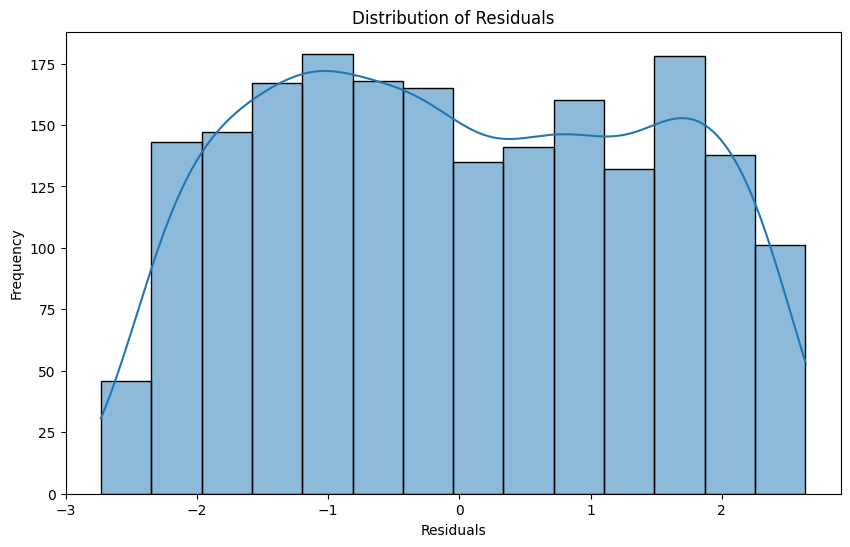

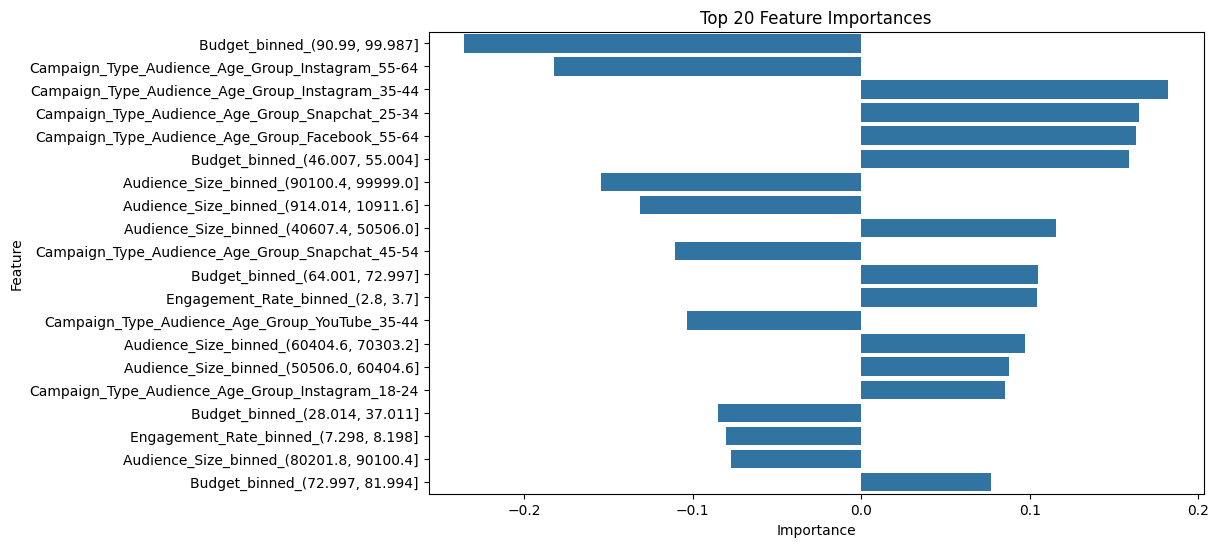

In [16]:
residuals = y_val - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


importances = model.coef_
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
importances_df['abs_importance'] = importances_df['importance'].abs()
importances_df = importances_df.sort_values('abs_importance', ascending=False).drop('abs_importance', axis=1)


top_20_features = importances_df.head(20)
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top_20_features)
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# KFOLDCrossValidatioN + Xgboost + LıghtGBM Then 3 model plots

# Hyperparameter with GridSearch And Optuna

# Pickle model